In [1]:
from __future__ import division
import itertools
# import h5py

import numpy as np
import matplotlib.pyplot as plt

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score


Using TensorFlow backend.


In [2]:
#Data preprocessing

In [3]:
#Load data
raw_img = np.load("images.npy")
raw_lab = np.load("labels.npy")

In [4]:
print raw_img.shape
print raw_lab.shape

(6500, 28, 28)
(6500,)


In [5]:
#Reshape image data, from 6500*28*28 to 6500*748
img_data = raw_img.reshape(6500, -1)
#Encode label data
lab_data = to_categorical(raw_lab)

In [6]:
#Stratified sampling
train_validation_img, test_img, train_validation_lab, test_lab = train_test_split(img_data, lab_data, test_size=0.25, random_state=2, stratify=lab_data)
train_img, validation_img, train_lab, validation_lab = train_test_split(train_validation_img, train_validation_lab, test_size=0.2, random_state=3, stratify=train_validation_lab)


In [7]:
print train_validation_img.shape
print train_validation_lab.shape
print
print test_img.shape
print test_lab.shape
print 
print train_img.shape
print train_lab.shape
print
print validation_img.shape
print validation_lab.shape

(4875, 784)
(4875, 10)

(1625, 784)
(1625, 10)

(3900, 784)
(3900, 10)

(975, 784)
(975, 10)


In [8]:
#Functions

In [9]:
#Plot training accuracy and validation accuracy during each epoch
def plot_acc(hist):
    fig, ax = plt.subplots(1, 1)
    ax.plot(hist.history["acc"], color="b", label="Training Accuracy")
    ax.plot(hist.history["val_acc"], color="r", label="Validation Accuracy")
    legend = ax.legend(loc="best", shadow=True)
    plt.show()

In [10]:
#Visualize confusion matrix
def plot_confusion_matrix(prediction,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function creates, prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    
    cm = confusion_matrix(np.argmax(test_lab, axis=1), np.argmax(prediction, axis=1))
    classes = list(range(10))
    
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    print 
    print "Accuracy: ", accuracy_score(np.argmax(test_lab, axis=1), np.argmax(prediction, axis=1))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [11]:
#Build and train model
def build_train_mod(act="relu", init="he_normal", perceptrons=[10], epo=10, b_s=512):
    model = Sequential() # declare model
    model.add(Dense(perceptrons[0], input_shape=(28*28, ), kernel_initializer=init)) # first layer
    model.add(Activation(act))
    # Fill in Model Here
    for i in range(1,len(perceptrons)):
        model.add(Dense(perceptrons[i], activation=act, kernel_initializer=init))
    #
    model.add(Dense(10, kernel_initializer=init)) # last layer
    model.add(Activation('softmax'))


    # Compile Model
    model.compile(optimizer='sgd',
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    # Train Model
    history = model.fit(train_img, train_lab, 
                        validation_data = (validation_img, validation_lab), 
                        epochs=epo, 
                        batch_size=b_s)
    return model, history

In [12]:
#Visualize image
def show_pic(pixel_data):
    plt.imshow(pixel_data.reshape(28, 28), cmap="gray")

In [13]:
#Get list of incorrect prediction indexes
def wrong_list(prediction):
    y_pred = np.argmax(prediction, axis=1)
    y_true = np.argmax(test_lab, axis=1)
    wrong_index = []
    for i in range(len(y_pred)):
        if(y_pred[i] != y_true[i]):
            wrong_index.append(i)
    return wrong_index

In [17]:
#First model
#Activition: relu, initialization: he_normal
#Layer number (exclude first layer and output layer): 2
#Node number of each layer (include the first layer): 10
#Epochs: 10
#Batch size = 16

In [29]:
# # Model Template

# model_1 = Sequential() # declare model
# model_1.add(Dense(10, input_shape=(28*28, ), kernel_initializer='he_normal')) # first layer
# model_1.add(Activation('relu'))
# # Fill in Model Here
# model_1.add(Dense(10, activation="relu", kernel_initializer="he_normal"))
# model_1.add(Dense(10, activation="relu", kernel_initializer="he_normal"))
# #
# model_1.add(Dense(10, kernel_initializer='he_normal')) # last layer
# model_1.add(Activation('softmax'))


# # Compile Model
# model_1.compile(optimizer='sgd',
#               loss='categorical_crossentropy', 
#               metrics=['accuracy'])

# # Train Model
# history_1 = model_1.fit(train_img, train_lab, 
#                     validation_data = (validation_img, validation_lab), 
#                     epochs=10, 
#                     batch_size=16)


# # Report Results

# # print(history_1.history)
# # model.predict()

model_1, history_1 = build_train_mod(act="relu", init="he_normal", perceptrons=[10, 10, 10], epo=10, b_s=16)

Train on 3900 samples, validate on 975 samples
Epoch 1/10
3900/3900 [==============================] - 1s 143us/step - loss: 2.9953 - acc: 0.1051 - val_loss: 2.3018 - val_acc: 0.1118
Epoch 2/10
3900/3900 [==============================] - 0s 85us/step - loss: 2.3013 - acc: 0.1123 - val_loss: 2.3013 - val_acc: 0.1118
Epoch 3/10
3900/3900 [==============================] - 0s 84us/step - loss: 2.3010 - acc: 0.1123 - val_loss: 2.3010 - val_acc: 0.1118
Epoch 4/10
3900/3900 [==============================] - 0s 84us/step - loss: 2.3001 - acc: 0.1121 - val_loss: 2.3002 - val_acc: 0.1128
Epoch 5/10
3900/3900 [==============================] - 0s 86us/step - loss: 2.2955 - acc: 0.1113 - val_loss: 2.2449 - val_acc: 0.1118
Epoch 6/10
3900/3900 [==============================] - 0s 95us/step - loss: 2.1260 - acc: 0.1779 - val_loss: 2.0729 - val_acc: 0.2123
Epoch 7/10
3900/3900 [==============================] - 0s 94us/step - loss: 2.0739 - acc: 0.2077 - val_loss: 2.0515 - val_acc: 0.2133
Epoch 8

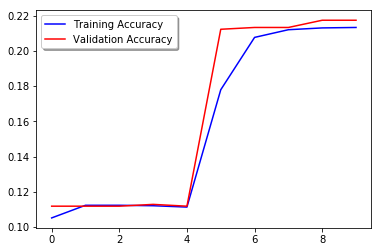

In [30]:
#Plot
plot_acc(history_1)

Confusion matrix, without normalization
[[  0   0   0   0   0   0   0 163   0   0]
 [  0 176   1   0   0   0   0   5   0   0]
 [  0   9   3   0   0   0   2 145   0   0]
 [  0   2   1   0   0   0   0 164   0   0]
 [  0   1   0   0   0   0   1 161   0   0]
 [  0   2   2   0   0   0   0 138   0   0]
 [  0   2   0   0   0   0   1 163   0   0]
 [  0   3   2   0   0   0   0 167   0   0]
 [  0   2   4   0   0   0   0 144   0   0]
 [  0   2   0   0   0   0   0 159   0   0]]

Accuracy:  0.21353846153846154


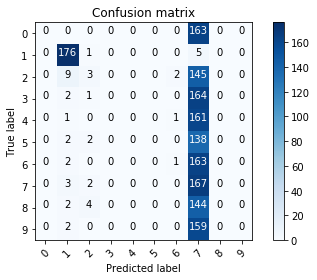

In [31]:
prediction_1 = model_1.predict(test_img)
plot_confusion_matrix(prediction=prediction_1)

In [32]:
#Second Model
#Activition: sigmoid
#Initialization: he_normal
#Layer number: 2
#Node number of each layer: 10
#Epochs: 100
#Batch size = 16

In [33]:
model_2 = Sequential() # declare model
model_2.add(Dense(10, input_shape=(28*28, ), kernel_initializer='he_normal')) # first layer
model_2.add(Activation('relu'))
# Fill in Model Here
model_2.add(Dense(10, activation="sigmoid", kernel_initializer="he_normal"))
model_2.add(Dense(10, activation="sigmoid", kernel_initializer="he_normal"))
#
model_2.add(Dense(10, kernel_initializer='he_normal')) # last layer
model_2.add(Activation('softmax'))


# Compile Model
model_2.compile(optimizer='sgd',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train Model
history_2 = model_2.fit(train_img, train_lab, 
                    validation_data = (validation_img, validation_lab), 
                    epochs=100, 
                    batch_size=16)

Train on 3900 samples, validate on 975 samples
Epoch 1/100
3900/3900 [==============================] - 1s 154us/step - loss: 2.2746 - acc: 0.1756 - val_loss: 2.2402 - val_acc: 0.1856
Epoch 2/100
3900/3900 [==============================] - 0s 83us/step - loss: 2.2122 - acc: 0.2303 - val_loss: 2.1913 - val_acc: 0.2862
Epoch 3/100
3900/3900 [==============================] - 0s 86us/step - loss: 2.1779 - acc: 0.2813 - val_loss: 2.1543 - val_acc: 0.3364
Epoch 4/100
3900/3900 [==============================] - 0s 86us/step - loss: 2.1386 - acc: 0.3508 - val_loss: 2.1306 - val_acc: 0.3477
Epoch 5/100
3900/3900 [==============================] - 0s 87us/step - loss: 2.1006 - acc: 0.3864 - val_loss: 2.0915 - val_acc: 0.3549
Epoch 6/100
3900/3900 [==============================] - 0s 84us/step - loss: 2.0566 - acc: 0.4218 - val_loss: 2.0364 - val_acc: 0.4328
Epoch 7/100
3900/3900 [==============================] - 0s 85us/step - loss: 2.0091 - acc: 0.4528 - val_loss: 1.9915 - val_acc: 0.4533


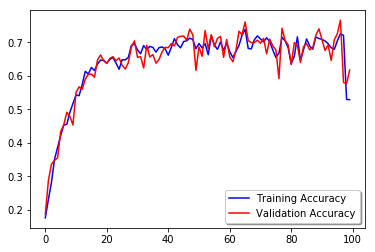

In [34]:
#Plot
plot_acc(history_2)

Confusion matrix, without normalization
[[ 89   0   0  62   0   6   0   2   4   0]
 [  0 138   0   0   0   0   0  11  33   0]
 [  0   5  68   2   6   2  18   5  53   0]
 [  1   1   2  71   0  41   1   5  45   0]
 [  0   0   3   0 120   0   2  23   1  14]
 [ 18   0   1  37   0  48   8   5  24   1]
 [  4   0  10   1  10   3 135   0   3   0]
 [  0   2   0   1   3   0   0 157   3   6]
 [  0   2   3   9   0   1   0   9 126   0]
 [  0   1   0   3   8   1   0 131   1  16]]

Accuracy:  0.5956923076923077


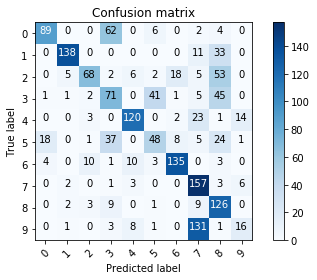

In [35]:
prediction_2 = model_2.predict(test_img)
plot_confusion_matrix(prediction=prediction_2)

In [36]:
#Activation: Relu, Selu, Tanh
#Initializer: he_normal, random_normal, 
#User bias: True, False
#Layer number:
#Neuron number: 
#Epoch number:
#Batch size: 

In [14]:
#Fourth model (Best so far)
#Activation: relu
#Initialization: random_normal
#Layer number: 2
#Node number for each layer: 80, 80, 10
#Epochs: 20
#Batch size: 16

In [23]:
model_4 = Sequential() # declare model
model_4.add(Dense(80, input_shape=(28*28, ), kernel_initializer='random_normal')) # first layer
model_4.add(Activation('relu'))
#
model_4.add(Dense(80, activation="relu", kernel_initializer="random_normal", bias_initializer="random_normal"))
model_4.add(Dense(10, activation="relu", kernel_initializer="random_normal", bias_initializer="random_normal"))
#
model_4.add(Dense(10, kernel_initializer='random_normal')) # last layer
model_4.add(Activation('softmax'))


# Compile Model
model_4.compile(optimizer='sgd',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train Model
history_4 = model_4.fit(train_img, train_lab, 
                    validation_data = (validation_img, validation_lab), 
                    epochs=20, 
                    batch_size=16)

Train on 3900 samples, validate on 975 samples
Epoch 1/20
3900/3900 [==============================] - 1s 166us/step - loss: 1.0598 - acc: 0.6451 - val_loss: 0.5050 - val_acc: 0.8513
Epoch 2/20
3900/3900 [==============================] - 0s 108us/step - loss: 0.4514 - acc: 0.8579 - val_loss: 0.4561 - val_acc: 0.8656
Epoch 3/20
3900/3900 [==============================] - 0s 110us/step - loss: 0.3047 - acc: 0.9103 - val_loss: 0.4537 - val_acc: 0.8892
Epoch 4/20
3900/3900 [==============================] - 0s 111us/step - loss: 0.2192 - acc: 0.9326 - val_loss: 0.3808 - val_acc: 0.9015
Epoch 5/20
3900/3900 [==============================] - 0s 109us/step - loss: 0.1650 - acc: 0.9497 - val_loss: 0.3655 - val_acc: 0.9056
Epoch 6/20
3900/3900 [==============================] - 0s 118us/step - loss: 0.1367 - acc: 0.9587 - val_loss: 0.3765 - val_acc: 0.9179
Epoch 7/20
3900/3900 [==============================] - 0s 110us/step - loss: 0.1053 - acc: 0.9695 - val_loss: 0.4771 - val_acc: 0.9169
E

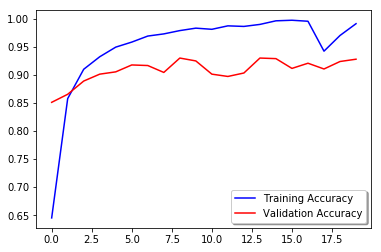

In [24]:
plot_acc(history_4)

Confusion matrix, without normalization
[[160   0   0   0   0   3   0   0   0   0]
 [  0 178   0   0   0   0   0   2   2   0]
 [  1   2 144   2   3   0   2   1   4   0]
 [  0   0   2 147   0  10   1   2   4   1]
 [  2   0   1   0 156   0   1   1   0   2]
 [  2   0   0   2   0 128   5   0   5   0]
 [  1   0   0   0   0   1 161   0   3   0]
 [  3   1   1   2   3   0   0 157   1   4]
 [  1   0   1   6   0   1   3   0 138   0]
 [  1   1   0   1   1   1   0   4   1 151]]

Accuracy:  0.9353846153846154


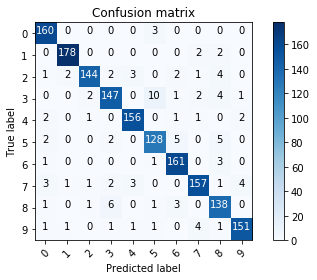

In [41]:
prediction_4 = model_4.predict(test_img)
plot_confusion_matrix(prediction_4)

In [42]:
recall_4 = recall_score(np.argmax(test_lab, axis=1), np.argmax(prediction_4, axis=1), labels=list(range(10)), average=None)
print recall_4

[0.98159509 0.97802198 0.90566038 0.88023952 0.95705521 0.90140845
 0.96987952 0.9127907  0.92       0.9378882 ]


In [43]:
precision_4 = precision_score(np.argmax(test_lab, axis=1), np.argmax(prediction_4, axis=1), labels=list(range(10)), average=None)
print precision_4

[0.93567251 0.97802198 0.96644295 0.91875    0.95705521 0.88888889
 0.93063584 0.94011976 0.87341772 0.9556962 ]


In [44]:
#Get a list of incorrect prediction indexes
incorrect_list_4 = wrong_list(prediction_4)
print incorrect_list_4
# print len(incorrect_list_4)

[10, 35, 37, 42, 64, 105, 107, 109, 123, 138, 141, 157, 160, 174, 214, 246, 252, 253, 271, 272, 275, 303, 314, 321, 351, 386, 390, 418, 443, 467, 475, 494, 523, 540, 545, 551, 559, 562, 584, 594, 623, 633, 639, 642, 659, 669, 671, 674, 678, 694, 702, 738, 750, 784, 788, 826, 832, 843, 861, 868, 885, 893, 905, 942, 947, 955, 957, 974, 985, 1001, 1019, 1058, 1062, 1076, 1091, 1106, 1122, 1136, 1149, 1150, 1160, 1162, 1170, 1181, 1188, 1195, 1210, 1225, 1271, 1298, 1313, 1318, 1335, 1351, 1362, 1383, 1442, 1474, 1481, 1493, 1499, 1514, 1548, 1556, 1589]


Label supported to be:  7
Prediction:  9


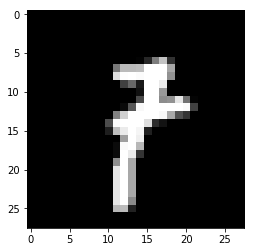

In [45]:
#Visualize incorrect prediction
print "Label supported to be: ", np.argmax(test_lab[10,])
print "Prediction: ", np.argmax(prediction_4[10,])
show_pic(test_img[10,])

Label supported to be:  3
Prediction:  8


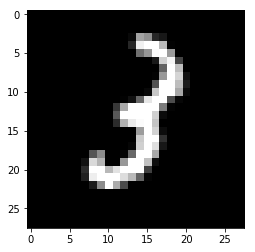

In [46]:
#Visualize incorrect prediction
print "Label supported to be: ", np.argmax(test_lab[35,])
print "Prediction: ", np.argmax(prediction_4[35,])
show_pic(test_img[35,])

Label supported to be:  7
Prediction:  9


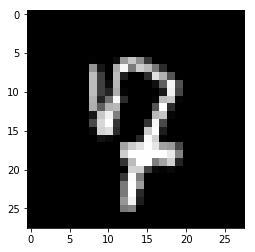

In [47]:
#Visualize incorrect prediction
print "Label supported to be: ", np.argmax(test_lab[42,])
print "Prediction: ", np.argmax(prediction_4[42,])
show_pic(test_img[42,])

In [48]:
# #Save best model
# #Try python 3
# import h5py
# model_4.save("/Users/leishi/Desktop/trained_model.h5")

In [ ]:
#Model 3
#Activation: selu
#Initialization: he_normal
#Layer number: 1
#Node number for each layer: 20, 20
#Epochs: 10
#Batch size: 256

In [49]:
model_3, history_3 = build_train_mod(act="selu", init="he_normal", perceptrons=[20, 20], epo=10, b_s=256)

Train on 3900 samples, validate on 975 samples
Epoch 1/10
3900/3900 [==============================] - 0s 83us/step - loss: 12.9241 - acc: 0.1856 - val_loss: 12.1597 - val_acc: 0.2400
Epoch 2/10
3900/3900 [==============================] - 0s 15us/step - loss: 10.5314 - acc: 0.3415 - val_loss: 9.9709 - val_acc: 0.3795
Epoch 3/10
3900/3900 [==============================] - 0s 19us/step - loss: 9.9272 - acc: 0.3803 - val_loss: 11.1183 - val_acc: 0.3067
Epoch 4/10
3900/3900 [==============================] - 0s 16us/step - loss: 10.4898 - acc: 0.3467 - val_loss: 11.1091 - val_acc: 0.3108
Epoch 5/10
3900/3900 [==============================] - 0s 14us/step - loss: 10.9546 - acc: 0.3192 - val_loss: 10.6495 - val_acc: 0.3333
Epoch 6/10
3900/3900 [==============================] - 0s 15us/step - loss: 10.0550 - acc: 0.3754 - val_loss: 9.9103 - val_acc: 0.3846
Epoch 7/10
3900/3900 [==============================] - 0s 18us/step - loss: 9.9131 - acc: 0.3844 - val_loss: 9.7522 - val_acc: 0.3949

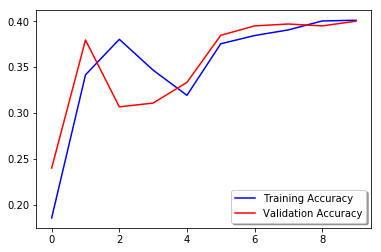

In [50]:
plot_acc(history_3)

In [51]:
#Model 5

In [139]:
model_5, history_5 = build_train_mod(act="selu", init="random_normal", perceptrons=[80, 80], epo=50, b_s=128)

Train on 3900 samples, validate on 975 samples
Epoch 1/50
3900/3900 [==============================] - 1s 310us/step - loss: 6.7753 - acc: 0.3708 - val_loss: 0.9161 - val_acc: 0.7200
Epoch 2/50
3900/3900 [==============================] - 0s 32us/step - loss: 0.6767 - acc: 0.7921 - val_loss: 0.7639 - val_acc: 0.7867
Epoch 3/50
3900/3900 [==============================] - 0s 34us/step - loss: 0.3886 - acc: 0.8728 - val_loss: 0.5423 - val_acc: 0.8462
Epoch 4/50
3900/3900 [==============================] - 0s 33us/step - loss: 0.2638 - acc: 0.9154 - val_loss: 0.5074 - val_acc: 0.8574
Epoch 5/50
3900/3900 [==============================] - 0s 33us/step - loss: 0.1911 - acc: 0.9410 - val_loss: 0.4829 - val_acc: 0.8687
Epoch 6/50
3900/3900 [==============================] - 0s 34us/step - loss: 0.1389 - acc: 0.9569 - val_loss: 0.4403 - val_acc: 0.8841
Epoch 7/50
3900/3900 [==============================] - 0s 30us/step - loss: 0.1074 - acc: 0.9677 - val_loss: 0.4922 - val_acc: 0.8749
Epoch 8

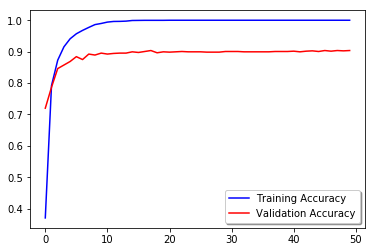

In [140]:
plot_acc(history_5)

In [ ]:
#Best so far
#Model 6

In [100]:
model_6 = Sequential() # declare model
model_6.add(Dense(100, input_shape=(28*28, ), kernel_initializer='random_normal')) # first layer
model_6.add(Activation('relu'))
#
model_6.add(Dense(100, activation="relu", kernel_initializer="random_normal", bias_initializer="random_normal"))
model_6.add(Dense(10, activation="relu", kernel_initializer="random_normal", bias_initializer="random_normal"))
#
model_6.add(Dense(10, kernel_initializer='random_normal')) # last layer
model_6.add(Activation('softmax'))


# Compile Model
model_6.compile(optimizer='sgd',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train Model
history_6 = model_6.fit(train_img, train_lab, 
                    validation_data = (validation_img, validation_lab), 
                    epochs=20, 
                    batch_size=16)

Train on 3900 samples, validate on 975 samples
Epoch 1/20
3900/3900 [==============================] - 1s 320us/step - loss: 1.2128 - acc: 0.5777 - val_loss: 0.6428 - val_acc: 0.7805
Epoch 2/20
3900/3900 [==============================] - 1s 135us/step - loss: 0.4927 - acc: 0.8508 - val_loss: 0.4272 - val_acc: 0.8738
Epoch 3/20
3900/3900 [==============================] - 1s 136us/step - loss: 0.2694 - acc: 0.9156 - val_loss: 0.3302 - val_acc: 0.9210
Epoch 4/20
3900/3900 [==============================] - 1s 145us/step - loss: 0.1975 - acc: 0.9400 - val_loss: 0.3035 - val_acc: 0.9169
Epoch 5/20
3900/3900 [==============================] - 1s 142us/step - loss: 0.1363 - acc: 0.9608 - val_loss: 0.3019 - val_acc: 0.9262
Epoch 6/20
3900/3900 [==============================] - 1s 140us/step - loss: 0.1086 - acc: 0.9692 - val_loss: 0.2593 - val_acc: 0.9374
Epoch 7/20
3900/3900 [==============================] - 1s 143us/step - loss: 0.0734 - acc: 0.9764 - val_loss: 0.3356 - val_acc: 0.9251
E

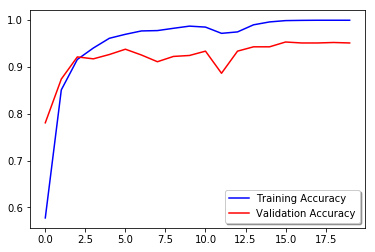

In [101]:
plot_acc(history_6)

Confusion matrix, without normalization
[[161   0   1   0   0   1   0   0   0   0]
 [  0 179   0   0   0   0   0   2   1   0]
 [  1   4 146   1   3   0   1   0   3   0]
 [  0   2   1 152   0   7   0   2   3   0]
 [  1   0   2   0 154   0   2   1   0   3]
 [  2   0   0   3   2 124   3   0   7   1]
 [  0   0   1   0   1   2 160   0   1   1]
 [  2   6   2   0   4   0   0 157   0   1]
 [  1   1   2   1   3   1   1   0 140   0]
 [  1   2   0   1   2   1   0   3   1 150]]

Accuracy:  0.9372307692307692


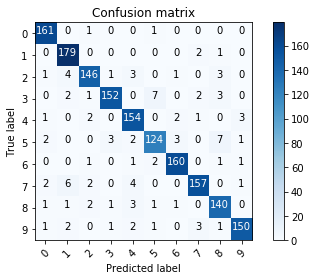

In [102]:
prediction_6 = model_6.predict(test_img)
plot_confusion_matrix(prediction_6)

In [103]:
#Model 7

In [110]:
model_7, history_7 = build_train_mod(act="tanh", init="random_normal", perceptrons=[100, 100, 10], epo=200, b_s=256)

Train on 3900 samples, validate on 975 samples
Epoch 1/200
3900/3900 [==============================] - 1s 224us/step - loss: 2.2983 - acc: 0.1167 - val_loss: 2.2961 - val_acc: 0.1282
Epoch 2/200
3900/3900 [==============================] - 0s 23us/step - loss: 2.2947 - acc: 0.1285 - val_loss: 2.2929 - val_acc: 0.1508
Epoch 3/200
3900/3900 [==============================] - 0s 22us/step - loss: 2.2912 - acc: 0.1438 - val_loss: 2.2897 - val_acc: 0.1631
Epoch 4/200
3900/3900 [==============================] - 0s 26us/step - loss: 2.2880 - acc: 0.1690 - val_loss: 2.2866 - val_acc: 0.1928
Epoch 5/200
3900/3900 [==============================] - 0s 21us/step - loss: 2.2846 - acc: 0.1944 - val_loss: 2.2832 - val_acc: 0.2123
Epoch 6/200
3900/3900 [==============================] - 0s 25us/step - loss: 2.2809 - acc: 0.2151 - val_loss: 2.2800 - val_acc: 0.2359
Epoch 7/200
3900/3900 [==============================] - 0s 25us/step - loss: 2.2772 - acc: 0.2431 - val_loss: 2.2763 - val_acc: 0.2523


3900/3900 [==============================] - 0s 24us/step - loss: 0.6816 - acc: 0.8628 - val_loss: 0.8140 - val_acc: 0.8010
Epoch 120/200
3900/3900 [==============================] - 0s 22us/step - loss: 0.6681 - acc: 0.8685 - val_loss: 0.8053 - val_acc: 0.8051
Epoch 121/200
3900/3900 [==============================] - 0s 21us/step - loss: 0.6576 - acc: 0.8710 - val_loss: 0.8023 - val_acc: 0.7979
Epoch 122/200
3900/3900 [==============================] - 0s 20us/step - loss: 0.6527 - acc: 0.8736 - val_loss: 0.7960 - val_acc: 0.7959
Epoch 123/200
3900/3900 [==============================] - 0s 22us/step - loss: 0.6453 - acc: 0.8741 - val_loss: 0.7956 - val_acc: 0.8041
Epoch 124/200
3900/3900 [==============================] - 0s 21us/step - loss: 0.6390 - acc: 0.8733 - val_loss: 0.7906 - val_acc: 0.8010
Epoch 125/200
3900/3900 [==============================] - 0s 25us/step - loss: 0.6334 - acc: 0.8731 - val_loss: 0.7796 - val_acc: 0.7969
Epoch 126/200
3900/3900 [=======================

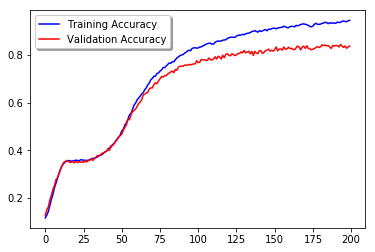

In [111]:
plot_acc(history_7)

In [112]:
math.sqrt(7480)

86.48699324175861

In [113]:
#Model 8

In [25]:
model_8, history_8 = build_train_mod(act="relu", init="random_uniform", perceptrons=[100, 100], epo=50, b_s=128)

Train on 3900 samples, validate on 975 samples
Epoch 1/50
3900/3900 [==============================] - 0s 83us/step - loss: 1.6016 - acc: 0.5990 - val_loss: 0.5900 - val_acc: 0.8195
Epoch 2/50
3900/3900 [==============================] - 0s 28us/step - loss: 0.4830 - acc: 0.8531 - val_loss: 0.5189 - val_acc: 0.8441
Epoch 3/50
3900/3900 [==============================] - 0s 28us/step - loss: 0.3248 - acc: 0.9041 - val_loss: 0.3702 - val_acc: 0.8913
Epoch 4/50
3900/3900 [==============================] - 0s 27us/step - loss: 0.2209 - acc: 0.9333 - val_loss: 0.3974 - val_acc: 0.8821
Epoch 5/50
3900/3900 [==============================] - 0s 27us/step - loss: 0.1825 - acc: 0.9462 - val_loss: 0.3368 - val_acc: 0.8974
Epoch 6/50
3900/3900 [==============================] - 0s 29us/step - loss: 0.1327 - acc: 0.9636 - val_loss: 0.3430 - val_acc: 0.8985
Epoch 7/50
3900/3900 [==============================] - 0s 33us/step - loss: 0.1131 - acc: 0.9677 - val_loss: 0.3288 - val_acc: 0.9046
Epoch 8/

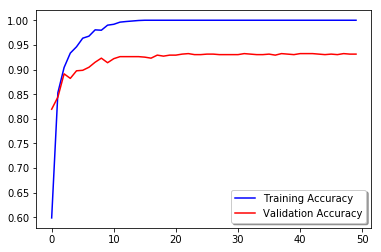

In [26]:
plot_acc(history_8)